AUTOMATED ROAD EXTRATION FROM MULTISPECTRAL HIGH RESOLUTION SATELLITE IMAGE

In [116]:
#Libraries required for this code
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

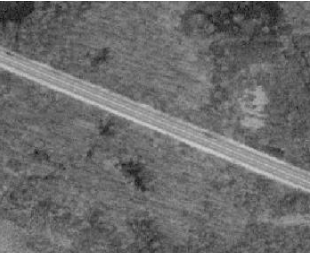

In [161]:
# Load the satellite image
satellite_image = cv2.imread('33.png')

# Convert the image to grayscale
gray = cv2.cvtColor(satellite_image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
cv2_imshow(gray)



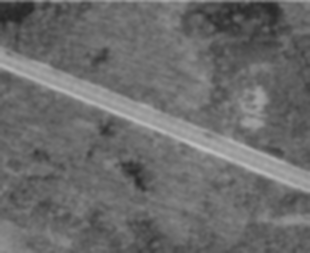

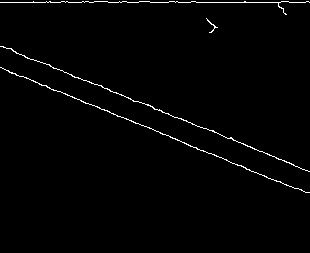

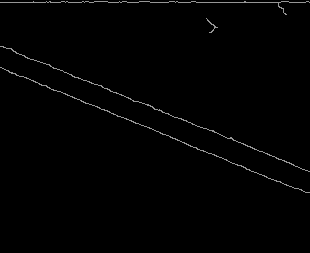

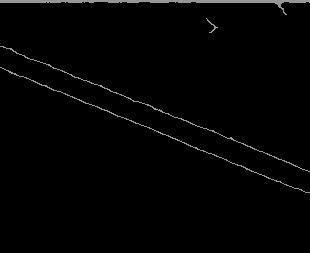

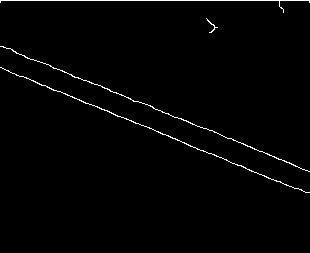

In [162]:
# Apply Gaussian blur to the grayscale image
gray_blur = cv2.GaussianBlur(gray, (7, 7), 0)

# Display the blurred image
cv2_imshow(gray_blur)

# Perform edge detection using Canny
edges = cv2.Canny(gray_blur, 50 , 150)

# Display the edge map
cv2_imshow(edges)

# Threshold the edge map to create a binary image
_, thresh = cv2.threshold(edges, 50, 150, cv2.THRESH_BINARY)

# Display the thresholded binary image
cv2_imshow(thresh)

# Perform morphological closing to fill gaps in the binary image
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Display the morphologically closed image
cv2_imshow(closed)

# Perform thinning on the binary image
thinned = cv2.ximgproc.thinning(closed)

# Display the thinned image
cv2_imshow(thinned)



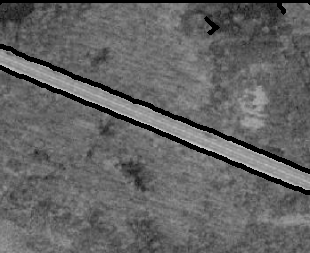

In [164]:
# Find contours and their hierarchy in the thinned image
contours, hierarchy = cv2.findContours(thinned, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Filter out small contours
filtered_contours = []
for i in range(len(contours)):
    contour = contours[i]
    contour_area = cv2.contourArea(contour)
    # Adjust this threshold as needed
    if contour_area > 1:
        # Check if the contour has a parent contour
        if hierarchy[0][i][3] == -1:
            filtered_contours.append(contour)

# Draw the filtered contours on the original image
contour_image = satellite_image.copy()
cv2.drawContours(contour_image, filtered_contours, -1, (0, 0, 0), 3)

# Display the image with road contours
cv2_imshow(contour_image)
